In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st
import warnings

warnings.filterwarnings('ignore')

In [2]:

df = pd.read_csv('final_file.csv')
df.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,8.6,1.02,7.116667
1,1,Card,20.5,1.86,24.816667
2,1,Card,7.9,0.70,6.933333
3,1,Card,23.3,2.80,29.433333
4,1,Card,16.3,2.19,16.233333


{'whiskers': [<matplotlib.lines.Line2D at 0x23838b6f5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x23838b6f970>,
 'boxes': [<matplotlib.lines.Line2D at 0x23838b6f340>],
 'medians': [<matplotlib.lines.Line2D at 0x23838b6feb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23838b8a190>],
 'means': []}

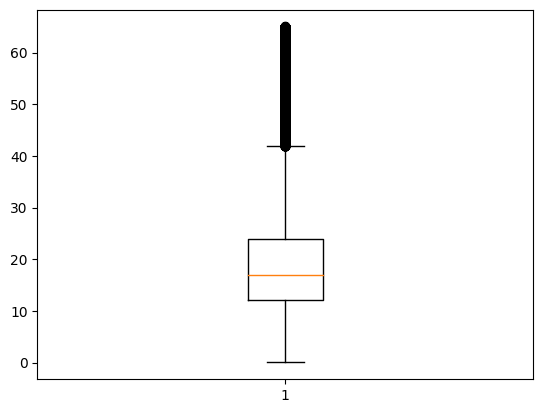

In [3]:
plt.boxplot(df['fare_amount'])

(array([121395., 623243., 689268., 456670., 282667., 149532.,  68088.,
          8890.,    721.,   1247.]),
 array([1.0000e-02, 6.5140e+00, 1.3018e+01, 1.9522e+01, 2.6026e+01,
        3.2530e+01, 3.9034e+01, 4.5538e+01, 5.2042e+01, 5.8546e+01,
        6.5050e+01]),
 <BarContainer object of 10 artists>)

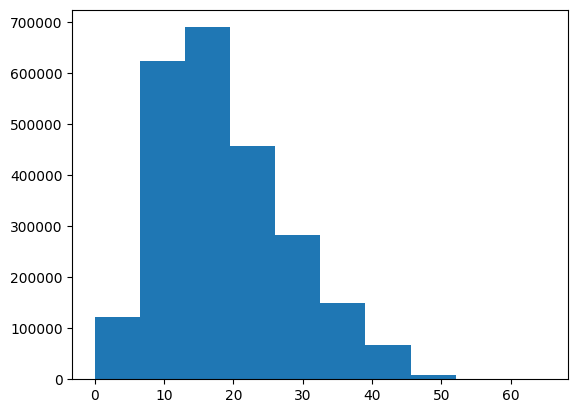

In [4]:
plt.hist(df['fare_amount'])

In [5]:
"""df['payment_type'].replace(['card', 'cash'], ['Card', 'Cash'], inplace = True)
df.to_csv('final_file.csv', index=False)"""

"df['payment_type'].replace(['card', 'cash'], ['Card', 'Cash'], inplace = True)\ndf.to_csv('final_file.csv', index=False)"

In [6]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.401721e+06,2.401721e+06,2.401721e+06,2.401721e+06
mean,1.561514e+00,1.885885e+01,3.063193e+00,1.697480e+01
std,9.645340e-01,9.159183e+00,2.251432e+00,8.469980e+00
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,1.210000e+01,1.420000e+00,1.051667e+01
50%,1.000000e+00,1.700000e+01,2.400000e+00,1.605000e+01
75%,2.000000e+00,2.400000e+01,4.000000e+00,2.241667e+01
max,5.000000e+00,6.505000e+01,9.980000e+00,4.161667e+01


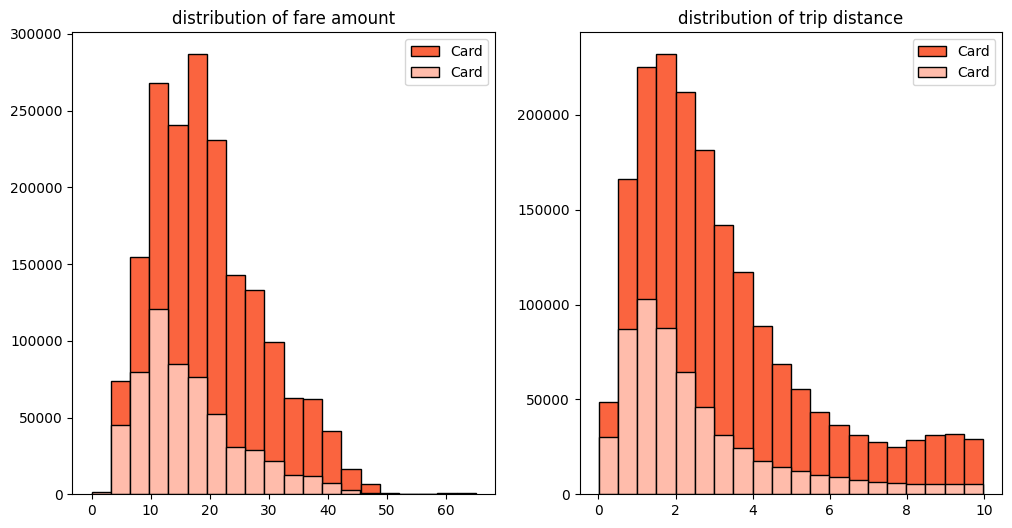

In [30]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('distribution of fare amount')
plt.hist(df[df['payment_type'] == 'Card']['fare_amount'], histtype='barstacked', bins=20, edgecolor = 'k', color= '#FA643F', label = 'Card')
plt.hist(df[df['payment_type'] == 'Cash']['fare_amount'], histtype='barstacked', bins=20, edgecolor = 'k', color = '#FFBCAB', label = 'Card')
plt.legend()
plt.subplot(1, 2, 2)
plt.title('distribution of trip distance')
plt.hist(df[df['payment_type'] == 'Card']['trip_distance'], histtype='barstacked', bins=20, edgecolor = 'k', color= '#FA643F', label = 'Card')
plt.hist(df[df['payment_type'] == 'Cash']['trip_distance'], histtype='barstacked', bins=20, edgecolor = 'k', color = '#FFBCAB', label = 'Card')
plt.legend()
plt.show()

In [8]:
df.groupby('payment_type').agg({'fare_amount': [ 'sum', 'mean', 'std'], 'trip_distance': [ 'sum', 'mean', 'std']})

fare_amount                      trip_distance            \
                      sum       mean       std           sum      mean   
payment_type                                                             
Card          35725579.55  19.597308  9.194435    5874394.26  3.222406   
Cash           9568111.11  16.532745  8.644321    1482540.50  2.561683   

                        
                   std  
payment_type            
Card          2.284212  
Cash          2.066221

#### By this graph we can say that When customers fare_amount or trip_distance is more they usually pay using Card

#### Let's see regarding the percetage

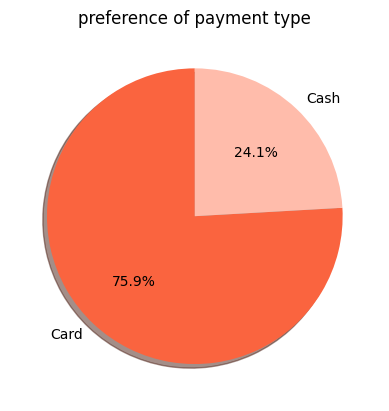

In [9]:
plt.title('preference of payment type')

plt.pie(df['payment_type'].value_counts(normalize=True), labels = df['payment_type'].value_counts().index,
        startangle = 90, shadow= True, autopct= '%1.1f%%', colors = ['#FA643F', '#FFBCAB'])

plt.show()

#### As we can see 76 % of customer uses card ans only 24 % uses Cash

In [10]:
passenger_count = df.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns={'passenger_count': 'count'}, inplace=True)
passenger_count.reset_index(inplace=True)
passenger_count

,payment_type,passenger_count,count
0,Card,1,1201808
1,Card,2,378621
2,Card,3,123359
3,Card,4,67240
4,Card,5,51956
5,Cash,1,388504
6,Cash,2,116207
7,Cash,3,36328
8,Cash,4,25937
9,Cash,5,11761


In [11]:
passenger_count['perc'] = (passenger_count['count'] / passenger_count['count'].sum()) * 100
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,1201808,50.039451
1,Card,2,378621,15.764570
2,Card,3,123359,5.136275
3,Card,4,67240,2.799659
4,Card,5,51956,2.163282
5,Cash,1,388504,16.176067
6,Cash,2,116207,4.838489
7,Cash,3,36328,1.512582
8,Cash,4,25937,1.079934
9,Cash,5,11761,0.489691


In [12]:
df2 = pd.DataFrame(columns= ['payment_type', 1, 2, 3, 4, 5])
df2['payment_type'] = ['Card', 'Cash']
df2.iloc[0, 1:] = passenger_count.iloc[0:5, -1]
df2.iloc[1, 1:] = passenger_count.iloc[5:, -1]
df2

,payment_type,1,2,3,4,5
0,Card,50.039451,15.76457,5.136275,2.799659,2.163282
1,Cash,16.176067,4.838489,1.512582,1.079934,0.489691


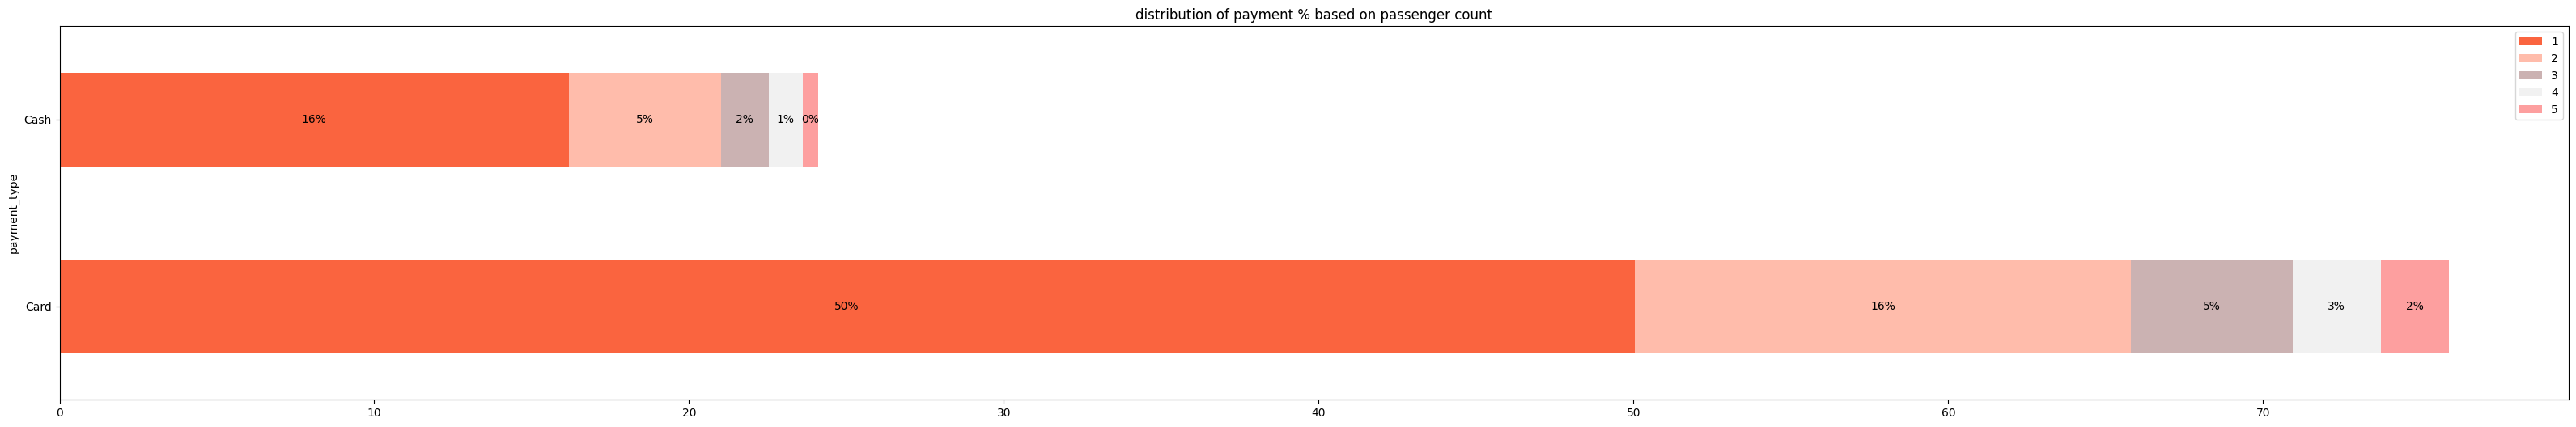

In [18]:
fig, ax = plt.subplots(figsize = (40, 6))
df2.plot(x = 'payment_type', kind = 'barh', stacked= True, ax = ax, color = ['#FA643F', '#FFBCAB', '#CBB2B2', 
                                                                    '#F1F1F1', '#FD9F9F'])
plt.title('distribution of payment % based on passenger count')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),
            horizontalalignment = 'center',
            verticalalignment = 'center')

### Null Hypothesis: There is no difference between customers who use credit cards and customers who use cash.
### Alternative Hypothesis: There is a differenec in avg fare between customers who use credit card and customers who use cash 

<function matplotlib.pyplot.show(close=None, block=None)>

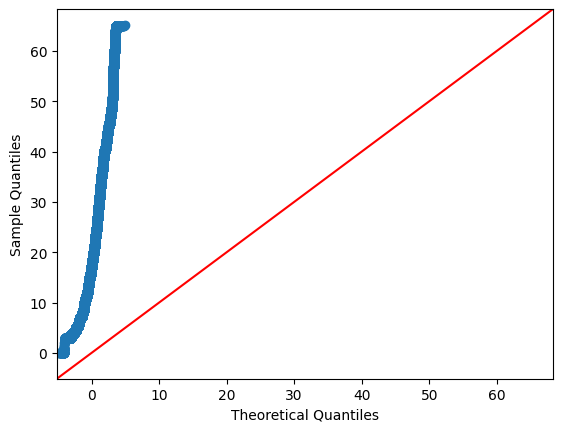

In [22]:

sm.qqplot(df['fare_amount'], line = '45')
plt.show

### T-test

In [26]:
card_sample = df[df['payment_type'] == 'Card']['fare_amount']
cash_sample = df[df['payment_type'] == 'Cash']['fare_amount']

In [29]:
t_stats, p_value = st.ttest_ind(a = card_sample, b = cash_sample, equal_var= False)
print('T statistic', t_stats, 'p-value', p_value)

T statistic 231.33600368870225 p-value 0.0


### With a T-statistice of 231.33 and a P-value of less than 0.05, We reject the null hypothesis, suggesting that there is indeed a significant difference in average fare amount between the two payment type 